# Multiclass Classification models

Multiclass classification can be thought of as a combination of multiple binary classifiers. There are two approaches to this problem:

- One VS Rest (OVR): Classifier is created for each possible class value, obtaining positive for cases where the prediction is *the class* and negative when it's any other class. Example: **square or not - circle or not - triangle or not - hexagon or not**

- One vs One (OVO): a classifier for each possible pair of classes is created. Example: **square or circle, square or triangle, square or hexagon, circle or triangle, circle or hexagon, triangle or hexagon**


"In both approaches, the overall model that combines the classifiers generates a vector of predictions, in which the probabilities generated from the individual binary classifiers are used to determine which class to predict."

*About the dataset: The penguins dataset used in the this exercise is a subset of data collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network*

## Hands on the data!!!

In [11]:
import os
import pathlib
import pandas as pd
from matplotlib import pyplot as plt
import urllib
from dotenv import load_dotenv


load_dotenv()

CSV_URL="https://raw.githubusercontent.com/MicrosoftLearning/mslearn-ml-basics/refs/heads/main/Labfiles/data/penguins.csv"

csv_path=pathlib.Path(os.environ["DATA_DIR"]) / "penguins.csv"

urllib.request.urlretrieve(CSV_URL, csv_path)

penguins=pd.read_csv(csv_path, delimiter=",", header="infer")



penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


Columns:

- CulmenLength: The length in mm of the penguin's culmen (bill).
- CulmenDepth: The depth in mm of the penguin's culmen.
- FlipperLength: The length in mm of the penguin's flipper.
- BodyMass: The body mass of the penguin in grams.
- Species: An integer value that represents the species of the penguin.

The species is the label we're going to predict

In [17]:
penguins=penguins.dropna()

We'll apply a stratification technique when splitting the data to maintain the proportion of each label value in the training and validation datasets.

In [18]:
from sklearn.model_selection import train_test_split


penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'

penguins_X, penguins_y= penguins[penguin_features].values, penguins[penguin_label].values


x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

In [19]:
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

#### Train multiclass the model

In [20]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

c:\Users\Salis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10.0, max_iter=10000, multi_class='auto')


In [21]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ', y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))


Overall Accuracy: 0.970873786407767
Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


As with binary classification, the report includes precision and recall metrics for each class. 

There are multiple classes so we need to look at an overall metric (either the macro or weighted average) to get a sense of how well the model performs across all three classes.

- Use micro-averaging score when there is a need to weight each instance or prediction equally.

- Use macro-averaging score when all classes need to be treated equally to evaluate the overall performance of the classifier with regard to the most frequent class labels.

- Use weighted macro-averaging score in case of class imbalances (different number of instances related to different class labels).

Definitions


- Micro-averaging and macro-averaging scoring metrics is used for evaluating models trained for *multi-class classification problems.*


- Macro-*averaging* scores are **arithmetic mean of individual classes’** score in relation to precision, recall and f1-score

- Micro-averaging precision scores is sum of true positive for individual classes divided by sum of predicted positives for all classes.   Micro-averaging recall scores is sum of true positive for individual classes divided by sum of actual positives for all classes

Source: [Scoring Metrics](https://vitalflux.com/micro-average-macro-average-scoring-metrics-multi-class-classification-python/)


### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


The confusion matrix shows the intersection of predicted and actual label values for each class, where the diagonal intersections from top-left to bottom-right indicate the number of correct predictions. (cheatsheet for more info)

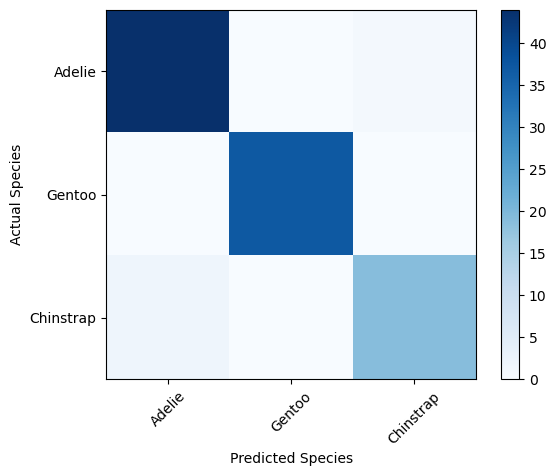

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

0=adelie
1=gentoo
2=chinstrap

In [27]:
import plotly.express as px

fig=px.density_heatmap(mcm)
fig.show()

In [28]:
from sklearn.metrics import roc_auc_score

penguin_prob = multi_model.predict_proba(x_penguin_test)
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9993574254297553


Pipelines

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


In [ ]:
#predictions
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Overall metrics
print("Overall Accuracy:", accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:", precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:", recall_score(y_penguin_test, penguin_predictions, average='macro'))

print('Average AUC:', roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr'))

Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


In [32]:
mcm2=confusion_matrix(y_penguin_test, penguin_predictions)

print(mcm2)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 1  0 20]]
[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]
